# Configurations

In [24]:
import os
class Configurations():
    
    # Dataset Config
    N_EPOCHS = 3
    BATCH_SIZE_TRAIN = 64
    BATCH_SIZE_TEST = 1000
    LEARNING_RATE = 0.01
    MOMENTUM = 0.5
    LOG_INTERVAL = 10
    
    #MNIST_FASHION_DATASET Configurations
    MNIST_FASHION_DATASET_PATH = os.path.join('../samples/data/mnist_fashion')
    MNIST_FASHION_LABELS = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
    
    #MNIST_DATASET Configurations
    MNIST_DATASET_PATH = os.path.join('../samples/data/mnist')
    
    #CIFAR_DATASET Configurations
    CIFAR10_DATASET_PATH = os.path.join('../samples/data/cifar10')
    CIFAR10_LABELS = ['Plane', 'Car', 'Bird', 'Cat','Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Dataloaders

In [2]:
from abc import abstractmethod
class Dataloader(): 
    
    def __init__(self, configs):
        self.configs = configs
        self.train_dataloader = self.load_train_dataloader()
        self.test_dataloader = self.load_test_dataloader()
    
    @abstractmethod
    def load_train_dataloader(self):
        """
        Loads & returns the training dataloader.

        :return: torchvision.Dataloader
        """
        raise NotImplementedError("load_train_dataloader() isn't implemented")
        
    @abstractmethod
    def load_test_dataloader(self):
        """
        Loads & returns the test dataloader.

        :return:torchvision.Dataloader
        """
        raise NotImplementedError("load_test_dataloader() isn't implemented")
        

In [3]:
import torch, torchvision
class MNISTDataloader(Dataloader): 
    
    def __init__(self, configs):
        super(MNISTDataloader, self).__init__(configs)
        
    def load_train_dataloader(self):
        transform = torchvision.transforms.Compose([torchvision.transforms.transforms.ToTensor()])
        
        train_dataset = torchvision.datasets.MNIST(
            self.configs.MNIST_DATASET_PATH, 
            train=True, download=True,
            transform=transform)
        
        train_loader = torch.utils.data.DataLoader(
            train_dataset,
            batch_size=self.configs.BATCH_SIZE_TRAIN, 
            shuffle=False)
        
        print("MNIST training loader loaded.")
        return train_loader
    
    def load_test_dataloader(self):
        transform = torchvision.transforms.Compose([torchvision.transforms.transforms.ToTensor()])
        
        test_dataset = torchvision.datasets.MNIST(
            self.configs.MNIST_DATASET_PATH, 
            train=False, download=True,
            transform=transform)
        
        test_loader = torch.utils.data.DataLoader(
            test_dataset,
            batch_size=self.configs.BATCH_SIZE_TEST, 
            shuffle=False)
        
        print("MNIST test loader loaded.")
        return test_loader


In [4]:
import torch, torchvision
class FashionMNISTDataloader(Dataloader): 
    
    def __init__(self, configs):
        super(FashionMNISTDataloader, self).__init__(configs)
        self.labels = self.configs.MNIST_FASHION_LABELS
        
    def load_train_dataloader(self):
        transform = torchvision.transforms.Compose([
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(
                (0.1307,), (0.3081,))
        ])
        
        train_dataset = torchvision.datasets.FashionMNIST(
            self.configs.MNIST_FASHION_DATASET_PATH, 
            train=True, download=True,
            transform=transform)
        
        train_loader = torch.utils.data.DataLoader(
            train_dataset,
            batch_size=self.configs.BATCH_SIZE_TRAIN, 
            shuffle=True)
        
        
        print("FashionMnist training loader loaded.")
        return train_loader
    
    def load_test_dataloader(self):
        transform = torchvision.transforms.Compose([
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(
                (0.1307,), (0.3081,))
        ])
        
        test_dataset = torchvision.datasets.FashionMNIST(
            self.configs.MNIST_FASHION_DATASET_PATH, 
            train=False, download=True,
            transform=transform)
        
        test_loader = torch.utils.data.DataLoader(
            test_dataset,
            batch_size=self.configs.BATCH_SIZE_TEST, 
            shuffle=False)
        
        
        print("FashionMnist training loader loaded.")
        return test_loader


In [18]:
import torch, torchvision
class CIFAR10Dataloader(Dataloader): 
    
    def __init__(self, configs):
        super(CIFAR10Dataloader, self).__init__(configs)
        self.labels = self.configs.CIFAR10_LABELS
        
    def load_train_dataloader(self):
        transform = torchvision.transforms.Compose([torchvision.transforms.transforms.ToTensor(),torchvision.transforms.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        
        train_dataset = torchvision.datasets.CIFAR10(
            self.configs.CIFAR10_DATASET_PATH, 
            train=True, download=True,
            transform=transform)
        
        train_loader = torch.utils.data.DataLoader(
            train_dataset,
            batch_size=self.configs.BATCH_SIZE_TRAIN, 
            shuffle=True)
        
        print("CIFAR10 training loader loaded.")
        return train_loader
    
    def load_test_dataloader(self):
        transform = torchvision.transforms.Compose([torchvision.transforms.transforms.ToTensor(),torchvision.transforms.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        
        test_dataset = torchvision.datasets.CIFAR10(
            self.configs.CIFAR10_DATASET_PATH, 
            train=False, download=True,
            transform=transform)
        
        test_loader = torch.utils.data.DataLoader(
            test_dataset,
            batch_size=self.configs.BATCH_SIZE_TEST, 
            shuffle=False)
        
        print("CIFAR10 test loader loaded.")
        return test_loader


# TEST FashionMNIST

In [28]:
config = Configurations()

fashion_mnist = FashionMNISTDataloader(config)

examples = enumerate(fashion_mnist.test_dataloader)
batch_idx, (example_data, example_targets) = next(examples)

example_data.shape

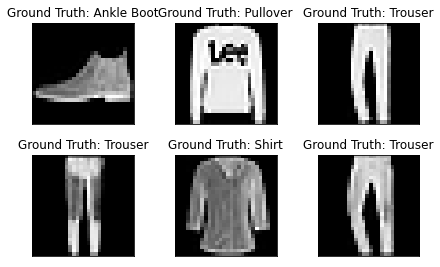

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(fashion_mnist.labels[example_targets[i]]))
    plt.xticks([])
    plt.yticks([])

# TEST MNIST

In [11]:
config = Configurations()
mnist = MNISTDataloader(config)
examples = enumerate(mnist.train_dataloader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape


MNIST training loader loaded.
MNIST test loader loaded.


torch.Size([64, 1, 28, 28])

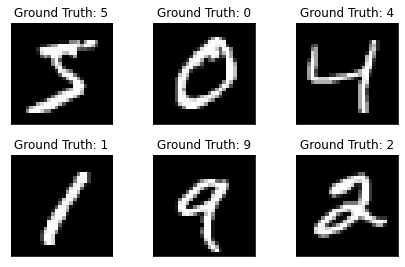

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

# TEST CIFAR10

Files already downloaded and verified
CIFAR10 training loader loaded.
Files already downloaded and verified
CIFAR10 test loader loaded.


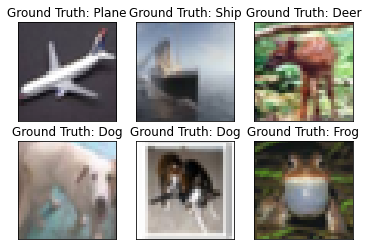

In [23]:
config = Configurations()
cifar10 = CIFAR10Dataloader(config)
examples = enumerate(cifar10.test_dataloader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(cifar10.train_dataloader)
images, labels = dataiter.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    img = torchvision.utils.make_grid(images[i])
    imshow(img)
    plt.title("Ground Truth: {}".format(cifar10.labels[labels[i]]))
    plt.xticks([])
    plt.yticks([])